# Classification Predict Student Solution

© Explore Data Science Academy

Honour Code
We {NM_1 Tech_Gurus}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code.

Non-compliance with the honour code constitutes a material breach of contract.

Predict Overview: EA - Twitter Sentiment Classification
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

# INTRODUCTION

In the modern business landscape, many organizations are passionately embedding eco-conscious principles into their foundation, seeking to mitigate environmental impacts and promote sustainability. These companies offer a variety of products and services that align seamlessly with their green ethos. A crucial part of their strategic marketing is understanding how the public perceives the looming threat of climate change and the extent to which they view it as an immediate concern. This knowledge will provide a critical lens through which to anticipate how their offerings may resonate with potential consumers.

Set against this backdrop, EDSA puts forth an exhilarating challenge during the Classification Sprint. Participants are tasked to construct a machine learning model with the ability to discern whether individuals believe in climate change or not, harnessing the power of unique tweet data for this purpose.

A comprehensive and precise solution to this challenge equips businesses with a key to unlock expansive consumer sentiment insights. These insights cut across a diverse array of demographic and geographic categories, paving the way for an enriched understanding that can underpin and shape their future marketing strategies

In [1]:
from IPython.display import Image
image_url = 'https://media.proprofs.com/images/QM/user_images/2286127/1551760625.jpg'
Image(url=image_url)

# Problem Statement
Companies operating in various industries need a reliable solution to understand the sentiments expressed by Twitter users regarding climate change. This information is crucial for making informed decisions, developing effective marketing strategies, and aligning their messaging with public sentiment. However, without a robust classification model, companies face challenges in accurately predicting sentiment and extracting valuable insights from the vast amount of data available on social media platforms. To address this problem, companies require a comprehensive sentiment analysis model that can provide real-time monitoring, sentiment classification, and trend analysis to help them stay ahead of the curve and effectively respond to the evolving concerns and preferences of their target audience.

In this notebook we set out to analyze tweets collected between Apr 27, 2015 and Feb 21, 2018 regarding climate change. We further wish to train a suitable and high performing classification model, to help classify the tweets into their respective sentiment categories regarding climate change.

# Table of Contents




1. [Importing Packages](#importing-packages)
2. [Data Loading](#data-loading)
3. [Exploratory Analysis](#exploratory-analysis)
4. [Data Engineering](#data-engineering)
5. [Building Models](#building-models)
6. [Model Performance](#model-performance)
7. [Model Explanations](#model-explanations)

# 1. Importing Packages

[Back to Table of Contents](#Table-of-Contents)

In [2]:
from comet_ml import Experiment

experiment = Experiment(
  api_key="iI4wg734rkuRFaqwXKZNNY2WW",
  project_name="nm-1-coders",
  workspace="thato-rabodiba"
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/thato-rabodiba/nm-1-coders/0ec8ab7a7eb54a52842a334dd2790864



In [3]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/thato-rabodiba/nm-1-coders/0ec8ab7a7eb54a52842a334dd2790864
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (17.41 MB)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: 
COMET INFO: Please wait for assets to f

In [4]:
# Libraries for data loading, data manipulation, and data visualization
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Library for basic plotting in Python
import seaborn as sns  # Library for statistical data visualization
import plotly.express as px  # Library for interactive visualizations
from IPython.core.display import HTML  # Library for rendering HTML content in Jupyter Notebook
import string

# Libraries for data preparation and model building
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 2. Loading the Data
[Back to Table of Contents](#Table-of-Contents)

⚡ Description: Loading the data ⚡
In this section you are required to load the data from the df_train file into a DataFrame.

In [5]:
# Load the data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test_with_no_labels.csv")

In [6]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954



The code df_train.head() displays the first 5 rows of the DataFrame df_train.

In [7]:
df_train.tail()

,sentiment,message,tweetid
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732
15818,0,RT @Chet_Cannon: .@kurteichenwald's 'climate c...,806319


The code displays a new DataFrame containing the specified number of rows from the end of the original DataFrame. The output includes both the column names and the corresponding data for those rows.

In [8]:
df_train.shape

(15819, 3)

The code df_train.shape provides a concise summary of the dimensions of the Pandas DataFrame df_train. In other words, it tells you how many rows (observations) and columns (features) exist in the DataFrame.

In [9]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [10]:
df_test.shape

(10546, 2)

# 2.1 Data Cleaning

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The df_train.info() code provides a valuable snapshot of your DataFrame's structure and data characteristics. It helps you identify potential issues with missing values, data type mismatches, or unexpected memory usage, allowing you to make informed decisions about data cleaning, analysis, and modeling.

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


The code df_test.info() provides a concise overview of the DataFrame df_test, offering valuable insights into its structure and data types.

Overall, df_test.info() provides a quick and informative summary of the essential characteristics of your DataFrame, enabling you to make informed decisions about data cleaning, exploration, and analysis.

In [13]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

The code df_train.isnull().sum() calculates and returns the number of null values (missing values) for each column in the DataFrame df_train.

So, the combined expression df_train.isnull().sum() essentially counts the number of True values (null values) for each column in the original DataFrame and returns a Series (single-dimensional array) containing these counts.

In [14]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

*This code is a common way to quickly assess the presence and extent of missing data in a DataFrame.

*It's often used in data cleaning and preparation stages to identify columns that might need further handling or imputation of missing values.

*Understanding missing data is crucial for ensuring accurate analysis and modeling results.

To remove the punction marks, @mentions and special characters, we create a function

In [15]:
import re

def clean_tweet(twts):
    ''' This function takes a array, list or series like objects containing tweets
        and replace all with empty pace, and convert to lower case
    '''
    
    # to convert to lower case
    twts = twts.lower()
    
    
    # Remove mentions (e.g., @username)
    twts = re.sub(r'@[A-Za-z0-9_]+', '', twts)

    # Remove URLs (e.g., https://example.com)
    twts = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', '', twts)

    # Remove punctuation marks
    twts = re.sub(r'[^\w\s]', '', twts)

    return twts

In [16]:
#df = df_train.copy() # assign the dataframe to a new object

#df = pd.concat([df_train,df_test])

df = df_train

df['message'] = df['message'].apply(clean_tweet)

In [17]:
df_test.message = df_test.message.apply(clean_tweet)

In [18]:
df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt researchers say we have three years to act...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt its 2016 and a racist sexist climate chang...,466954


In [19]:
df.tail()

,sentiment,message,tweetid
15814,1,rt they took down the material on global warm...,22001
15815,2,rt how climate change could be breaking up a ...,17856
15816,0,notiven rt nytimesworld what does trump actual...,384248
15817,-1,rt hey liberals the climate change crap is a ...,819732
15818,0,rt s climate change equation in 4 screenshots,806319


In [20]:
df.shape

(15819, 3)

In [21]:
# check for duplicate row in the data frame

df.duplicated().sum()

0

In [22]:
with pd.option_context('display.max_colwidth', None):
  display(df)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what via,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,rt researchers say we have three years to act on climate change before its too late,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change,573736
4,1,rt its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954
...,...,...,...
15814,1,rt they took down the material on global warming lgbt rights and health care but now theyre hocking melanias qvc https,22001
15815,2,rt how climate change could be breaking up a 200millionyearold relationship,17856
15816,0,notiven rt nytimesworld what does trump actually believe about climate change rick perry joins other aides in,384248
15817,-1,rt hey liberals the climate change crap is a hoax that ties to agenda2030\nthe climate is being changed byãââ,819732


In [23]:
# Function to remove 'RT' from tweets
def remove_rt(tweet):
    return tweet.replace('rt', '')

# Apply the function to the 'tweets' column
df['message'] = df['message'].apply(remove_rt)

In [24]:
df_test.message = df_test.message.apply(remove_rt)

In [25]:
with pd.option_context('display.max_colwidth', None):
  display(df)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what via,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,researchers say we have three years to act on climate change before its too late,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change,573736
4,1,its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954
...,...,...,...
15814,1,they took down the material on global warming lgbt rights and health care but now theyre hocking melanias qvc https,22001
15815,2,how climate change could be breaking up a 200millionyearold relationship,17856
15816,0,notiven nytimesworld what does trump actually believe about climate change rick perry joins other aides in,384248
15817,-1,hey liberals the climate change crap is a hoax that ties to agenda2030\nthe climate is being changed byãââ,819732


In [26]:
#removes all non-english (non-ascii) characters
def remove_non_ascii(message):
    return ''.join([l for l in message if l in string.printable])

df['message'] = df['message'].apply(remove_non_ascii)

In [27]:
df_test.message = df_test.message.apply(remove_non_ascii)

# NOTE: | Our data is relatively clean now we can move on with the EDA section to understand more about the data |

In [28]:
with pd.option_context('display.max_colwidth', None):
  display(df)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what via,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,researchers say we have three years to act on climate change before its too late,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change,573736
4,1,its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954
...,...,...,...
15814,1,they took down the material on global warming lgbt rights and health care but now theyre hocking melanias qvc https,22001
15815,2,how climate change could be breaking up a 200millionyearold relationship,17856
15816,0,notiven nytimesworld what does trump actually believe about climate change rick perry joins other aides in,384248
15817,-1,hey liberals the climate change crap is a hoax that ties to agenda2030\nthe climate is being changed by,819732


In [29]:
with pd.option_context('display.max_colwidth', None):
  display(df_test)

,message,tweetid
0,europe will now be looking to china to make sure that it is not alone in fighting climate change,169760
1,combine this with the polling of staffers re climate change and womens rights and you have a fascist state,35326
2,the scary unimpeachable evidence that climate change is already here itstimetochange climatechange,224985
3,\nputin got to you too jill \ntrump doesnt believe in climate change at all \nthinks its s hoax,476263
4,female orgasms cause global warming\nsarcastic republican,872928
...,...,...
10541,brb writing a poem about climate change climatechange science poetry fakenews alternativefacts,895714
10542,2016 the year climate change came home during the hottest year on record karl mathiesen travelled to tasmania,875167
10543,pacific countries positive about fiji leading the global climate change conference in november,78329
10544,youre so hot you must be the cause for global warming aldublaboroflove,867455


# 3. Exploratory Data Analysis (EDA)
[Back to Table of Contents](#Table-of-Contents)

⚡ Description: Exploratory data analysis ⚡ In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame.

Given that we're dealing with numerical data, let's conduct a statistical analysis, specifically focusing on generating the five-number summary.

In [30]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment,15819.0,0.917504,0.836537,-1.0,1.0,1.0,1.0,2.0
tweetid,15819.0,501719.433656,289045.983132,6.0,253207.5,502291.0,753769.0,999888.0


In [31]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
tweetid,10546.0,496899.936943,288115.677148,231.0,246162.5,495923.0,742250.0,999983.0


This approach allows us to analyze the skewness of the combined dataset, providing insights into the distribution of numerical features across both training and testing data.

In [32]:
# Concatenate df_train and df_test
df_combined = pd.concat([df_train, df_test], ignore_index=True)

# Select only numeric columns
numeric_columns = df_combined.select_dtypes(include=['float64', 'int64'])

# Compute skewness for numeric columns
skewness = numeric_columns.skew()

# Print skewness values
print(skewness)

sentiment   -0.683959
tweetid     -0.003804
dtype: float64


This concatenates the df_train and df_test dataframes to create a combined dataframe (df_combined). It then selects only the numeric columns from this combined dataframe and computes the kurtosis for each numeric column.

In [33]:
# Concatenate df_train and df_test
df_combined = pd.concat([df_train, df_test], ignore_index=True)

# Select only numeric columns
numeric_columns = df_combined.select_dtypes(include=['float64', 'int64'])

# Compute kurtosis for numeric columns
kurtosis_values = numeric_columns.kurtosis()

# Print kurtosis values
print(kurtosis_values)

sentiment    0.122976
tweetid     -1.193841
dtype: float64


The bar plot above illustrates the distribution of tweets across different sentiment classes.

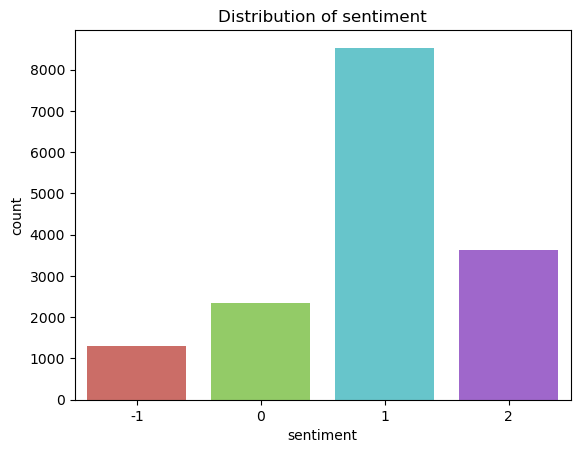

In [34]:
# To visualize the distributon of the sentiments, we plot a count plot and the unique sentiments we have 

sns.countplot(x = 'sentiment', data = df, palette="hls")
plt.title("Distribution of sentiment");

['pro' 'news' 'neutral' 'anti']


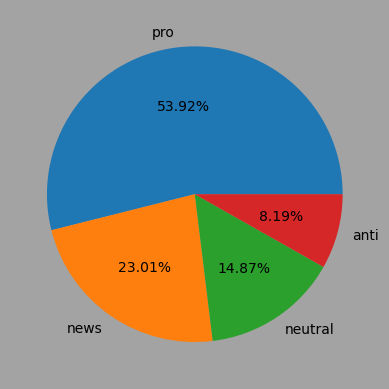

In [35]:
pie_x = df.sentiment.value_counts()
labels = df.sentiment.unique()


# Define the label mapping dictionary
label_mapping = {1: 'pro', 2: 'news', 0: 'neutral', -1: 'anti'}

# Create a vectorized function to apply the mapping
vfunc = np.vectorize(lambda x: label_mapping[x])

# Apply the mapping to the labels
mapped_labels = vfunc(labels)
print(mapped_labels)

# Remove the white background
plt.figure().set_facecolor('#A3A3A3')
plt.pie(df['sentiment'].value_counts(),autopct='%0.2f%%', labels = mapped_labels)
plt.show()

Observation:
from the bar graph above, we can deduce that we have 4 groups of sentiments.

1.the sentiment is imbalanced

2.let explore the tweets to generate insights

To create a word cloud we first need to tokenize the tweets, lemmatize or stem the words and then join all as single sentences to create the word cloud

*The word cloud will be divided into two groups one for people who believe in the effect of climate change and the other for those who do not beleieve

In [36]:
# import the word tokenizer to tokenize the twts, and lemmatizer to find the root word of the words in each message
# from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet

In [37]:
#Initialise the lemmatizer
lemma = WordNetLemmatizer()

# # Define a function to lemmatize a single tweet
# def lemmatize_tweet(tweet):
    
#     # Lemmatize each word and join them back into a single string
#     lemmatized_words = [lemma.lemmatize(twt) for twt in tweet]
#     lemmatized_tweet = ' '.join(lemmatized_words)

#     return lemmatized_tweet

def lemmatize_tweet(df):
    df["length"] = df["message"].str.len()
    df["tokenized"] = df["message"].apply(word_tokenize)
    df["parts-of-speech"] = df["tokenized"].apply(nltk.tag.pos_tag)
    
    def str2wordnet(tag):
        conversion = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, "R": wordnet.ADV}
        try:
            return conversion[tag[0].upper()]
        except KeyError:
            return wordnet.NOUN
    
    
    df["parts-of-speech"] = df["parts-of-speech"].apply(
        lambda tokens: [(word, str2wordnet(tag)) for word, tag in tokens]
    )
    df["clean_tweet"] = df["parts-of-speech"].apply(
        lambda tokens: [lemma.lemmatize(word, tag) for word, tag in tokens]
    )
    df["clean_tweet"] = df["clean_tweet"].apply(lambda tokens: " ".join(map(str, tokens)))
    
    return df

In [38]:
# df['clean_tweet'] = df['message'].apply(lemmatize_tweet)
df = lemmatize_tweet(df)

In [39]:
df_test = lemmatize_tweet(df_test)

In [40]:
df.head()

,sentiment,message,tweetid,length,tokenized,parts-of-speech,clean_tweet
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,102,"[polyscimajor, epa, chief, doesnt, think, carb...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...,126103,61,"[its, not, like, we, lack, evidence, of, anthr...","[(its, n), (not, r), (like, n), (we, n), (lack...",it not like we lack evidence of anthropogenic ...
2,2,researchers say we have three years to act o...,698562,84,"[researchers, say, we, have, three, years, to,...","[(researchers, n), (say, v), (we, n), (have, v...",researcher say we have three year to act on cl...
3,1,todayinmaker wired 2016 was a pivotal year in...,573736,73,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[(todayinmaker, n), (wired, v), (2016, n), (wa...",todayinmaker wire 2016 be a pivotal year in th...
4,1,its 2016 and a racist sexist climate change ...,466954,97,"[its, 2016, and, a, racist, sexist, climate, c...","[(its, n), (2016, n), (and, n), (a, n), (racis...",it 2016 and a racist sexist climate change den...


# We removed the stop words from the clean_tweets before drawing our wordcloud

In [41]:
# create a function that removes stop words
def remove_stopwords(text):
    
    # create a set containing the stopwords we wish to remove
    stop_words = set(stopwords.words('english'))
    
    text = nltk.word_tokenize(text.lower())
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stop_words:
            y.append(i)
            
    return " ".join(y)

In [42]:
df['clean_tweet'] = df['clean_tweet'].apply(remove_stopwords)
df.head()

,sentiment,message,tweetid,length,tokenized,parts-of-speech,clean_tweet
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,102,"[polyscimajor, epa, chief, doesnt, think, carb...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...,126103,61,"[its, not, like, we, lack, evidence, of, anthr...","[(its, n), (not, r), (like, n), (we, n), (lack...",like lack evidence anthropogenic global warming
2,2,researchers say we have three years to act o...,698562,84,"[researchers, say, we, have, three, years, to,...","[(researchers, n), (say, v), (we, n), (have, v...",researcher say three year act climate change late
3,1,todayinmaker wired 2016 was a pivotal year in...,573736,73,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[(todayinmaker, n), (wired, v), (2016, n), (wa...",todayinmaker wire 2016 pivotal year war climat...
4,1,its 2016 and a racist sexist climate change ...,466954,97,"[its, 2016, and, a, racist, sexist, climate, c...","[(its, n), (2016, n), (and, n), (a, n), (racis...",2016 racist sexist climate change deny bigot l...


this code is about taking a bunch of text messages (tweets) and cleaning them up by removing common words that don't add much meaning.

In [43]:
df_test.clean_tweet = df_test.clean_tweet.apply(remove_stopwords)
df_test.head()

,message,tweetid,length,tokenized,parts-of-speech,clean_tweet
0,europe will now be looking to china to make su...,169760,97,"[europe, will, now, be, looking, to, china, to...","[(europe, n), (will, n), (now, r), (be, v), (l...",europe look china make sure alone fight climat...
1,combine this with the polling of staffers re c...,35326,107,"[combine, this, with, the, polling, of, staffe...","[(combine, n), (this, n), (with, n), (the, n),...",combine polling staffer climate change womens ...
2,the scary unimpeachable evidence that climate ...,224985,100,"[the, scary, unimpeachable, evidence, that, cl...","[(the, n), (scary, a), (unimpeachable, a), (ev...",scary unimpeachable evidence climate change al...
3,\nputin got to you too jill \ntrump doesn...,476263,97,"[putin, got, to, you, too, jill, trump, doesnt...","[(putin, n), (got, v), (to, n), (you, n), (too...",putin get jill trump doesnt believe climate ch...
4,female orgasms cause global warming\nsarcast...,872928,58,"[female, orgasms, cause, global, warming, sarc...","[(female, a), (orgasms, n), (cause, v), (globa...",female orgasm cause global warming sarcastic r...


This code is working with a DataFrame named df_test. It's updating a column named clean_tweet by applying a function called remove_stopwords to each value in that column. Finally, it shows the first few rows of the DataFrame after the update.

# Generate the wordcloud for all words in the messages

In [44]:
# start by installing WordCloud in your local machine before running this cell
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [45]:
# visualize the frequent words using wordcloud
all_words = " ".join([sentence for sentence in df['clean_tweet']])

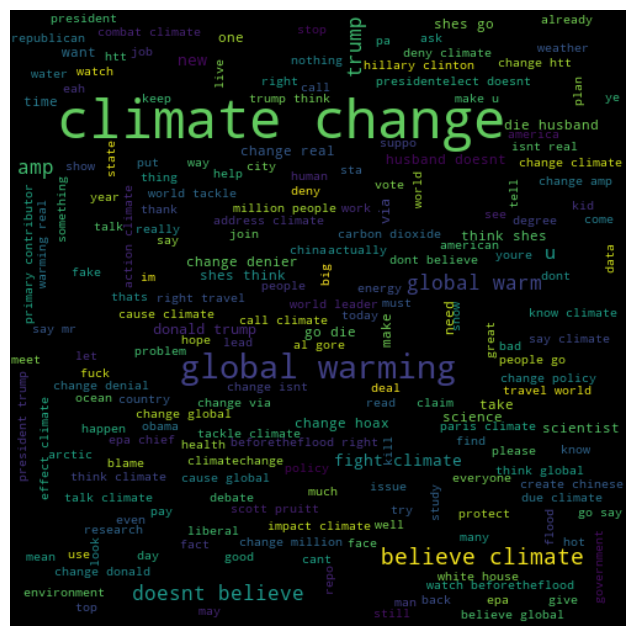

In [46]:
wordcloud_gen = wc.generate(all_words)
# plot the graph
plt.figure(figsize=(18,8))
plt.imshow(wordcloud_gen, interpolation='bilinear')
plt.axis('off')
plt.show()

This code creates a word cloud from a collection of words (all_words). First, it uses wc.generate(all_words) to generate the word cloud data. Then, it sets up a plot to display the word cloud. The plt.figure(figsize=(18,8)) line specifies the size of the plot. plt.imshow(wordcloud_gen, interpolation='bilinear') displays the word cloud image, and plt.axis('off') turns off the axis labels. Finally, plt.show() shows the plot with the word cloud.

# Sentiment 1: The tweets that support the belief of man-made climate change

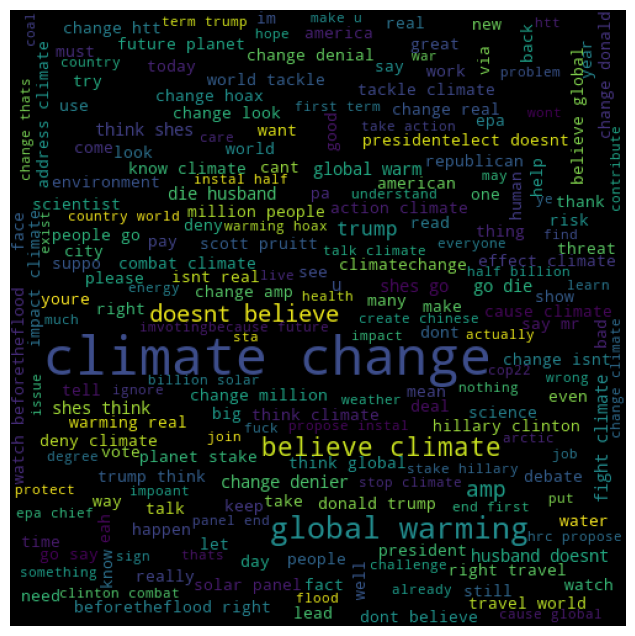

In [47]:
ptv_sentiment = wc.generate(df[df['sentiment'] == 1]['clean_tweet'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

This code creates a word cloud for a specific sentiment (sentiment value of 1) from a DataFrame df. It first filters the DataFrame to select only the rows where the 'sentiment' column is equal to 1 (df[df['sentiment'] == 1]), then it concatenates all the 'clean_tweet' values into a single string using .str.cat(sep=" ").

Next, it generates the word cloud using wc.generate() on the concatenated string. The plt.figure(figsize=(18,8)) line sets the size of the plot. plt.imshow(ptv_sentiment) displays the word cloud image, and plt.axis('off') turns off the axis labels. Finally, plt.show() shows the plot with the word cloud.

# We checked the top ten most common words for each class of tweet

In [48]:
# Converting tweet messages to a List of words and extracting the top 10 words


# top 10 word for Sentiment 2 (linked to factual news) tweets
twts = df[df['sentiment'] == 2]['clean_tweet'].str.cat(sep= " ")
climate_twt = twts.split()


# Counting Top 10 Words in each tweet message

from collections import Counter
twt_top_10words = pd.DataFrame(Counter(climate_twt).most_common(10))
twt_top_10words.head()

,0,1
0,climate,3350
1,change,3276
2,trump,1023
3,global,507
4,warming,357


# Bar plot of top 10 words in Sentiment 2 tweets (linked to factual news)

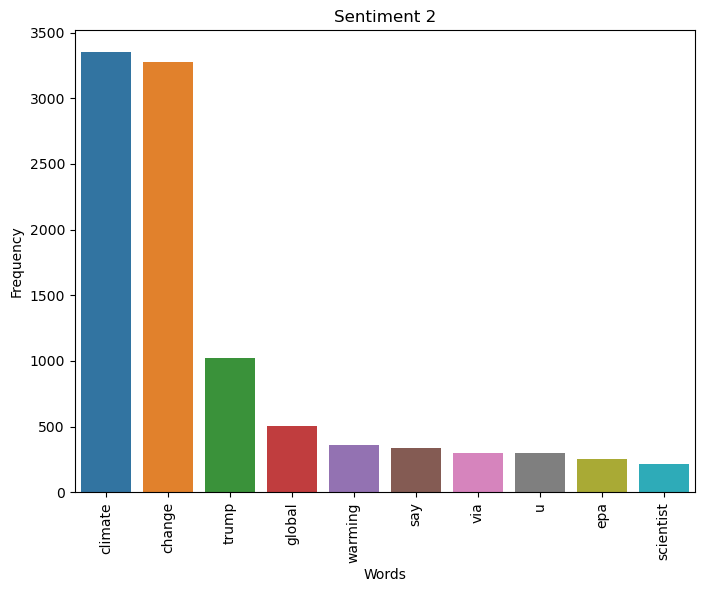

In [49]:
#plot bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x= twt_top_10words[0], y= twt_top_10words[1])
plt.xticks(rotation=90)
plt.xlabel('Words')  
plt.ylabel('Frequency')
plt.title('Sentiment 2')  
plt.show()

In [50]:
# top 10 word for sentiment 1 tweets(pro) 
twts = df[df['sentiment'] == 1]['clean_tweet'].str.cat(sep= " ")
anti_twt = twts.split()


# Counting Top 10 Words in each tweet message

from collections import Counter
anti_twt_top_10words = pd.DataFrame(Counter(anti_twt).most_common(10))
anti_twt_top_10words.head()

,0,1
0,climate,7366
1,change,7207
2,global,1597
3,warming,1165
4,believe,1118


# Bar plot of top 10 words in Sentiment 1 tweets (Pro)

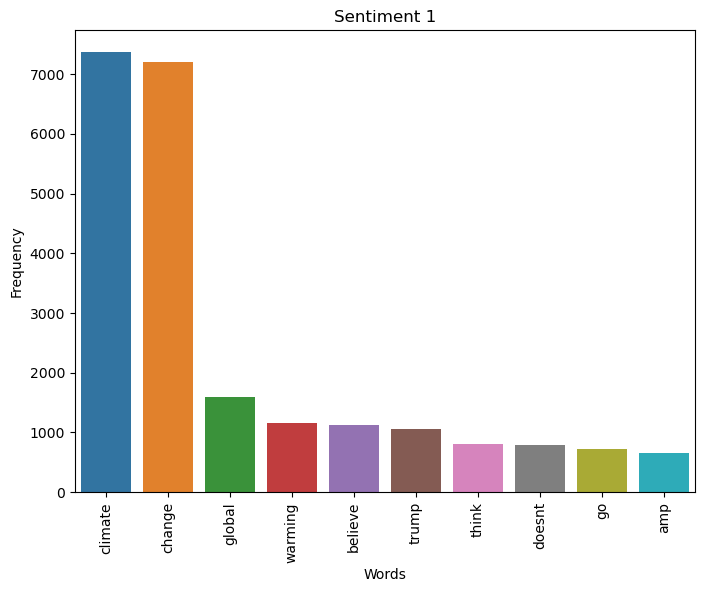

In [51]:
#plot a bar plot

plt.figure(figsize=(8, 6))
sns.barplot(x= anti_twt_top_10words[0], y= anti_twt_top_10words[1])
plt.xticks(rotation=90)
plt.xlabel('Words')  
plt.ylabel('Frequency')  
plt.title('Sentiment 1')
plt.show()

In [52]:
# top 10 word for sentiment 0 tweets (Neutral)
twts = df[df['sentiment'] == 0]['clean_tweet'].str.cat(sep= " ")
anti_twt = twts.split()


# Counting Top 10 Words in each tweet message

from collections import Counter
news_twt_top_10words = pd.DataFrame(Counter(anti_twt).most_common(10))
news_twt_top_10words.head()

,0,1
0,climate,1444
1,change,1415
2,global,1039
3,warming,819
4,warm,198


# Bar plot of top 10 words in Sentiment 0 tweets (Neutral)

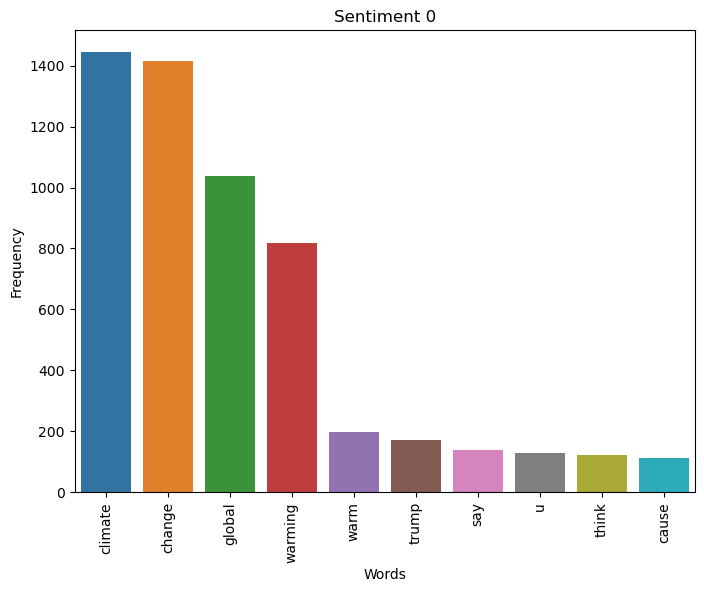

In [53]:
# plot a bar plot

plt.figure(figsize=(8, 6))
sns.barplot(x= news_twt_top_10words[0], y= news_twt_top_10words[1])
plt.xticks(rotation=90)
plt.xlabel('Words')  
plt.ylabel('Frequency')  
plt.title('Sentiment 0')
plt.show()

In [54]:
# top 10 word for sentiment -1 tweets (Anti)
twts = df[df['sentiment'] == -1]['clean_tweet'].str.cat(sep= " ")
neutral_twt = twts.split()


# Counting Top 10 Words in each tweet message

from collections import Counter
neutral_twt_top_10words = pd.DataFrame(Counter(neutral_twt).most_common(10))
neutral_twt_top_10words.head()

,0,1
0,climate,800
1,change,774
2,global,635
3,warming,475
4,warm,141


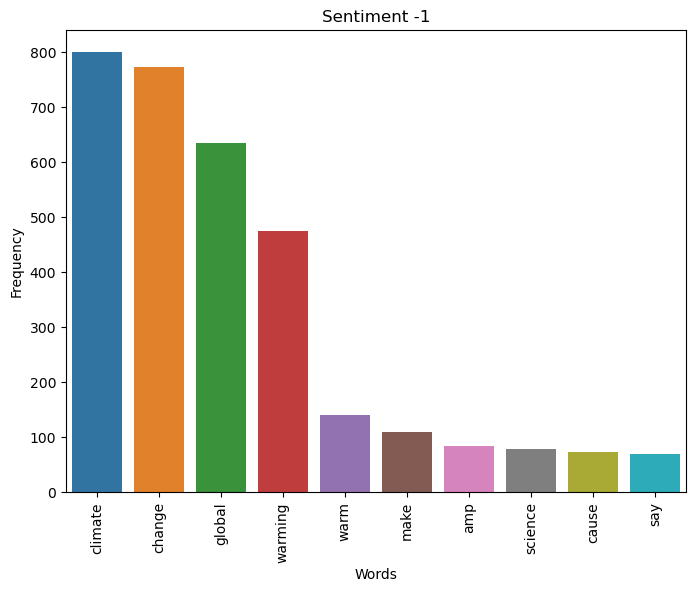

In [55]:
# plot a bar plot

plt.figure(figsize=(8, 6))
sns.barplot(x = neutral_twt_top_10words[0], y= neutral_twt_top_10words[1])
plt.xticks(rotation=90)
plt.xlabel('Words')  
plt.ylabel('Frequency')  
plt.title('Sentiment -1')
plt.show()

# Insights from the EDA

1.Among the observed data, approximately 53.92% express belief in man-made climate change.

2.Approximately 23.01% of the observed data links to factual news about climate change.

3.Around 15% of the observed data exhibit a neutral stance towards climate change.

4.Approximately 8% of the observed data express disbelief in man-made climate change.

5.Based on the generated word clouds, the term "climate change" emerges as the most frequently used word across all sentiment types.

6.The name "Trump" appears as a prominent influencer in discussions related to climate change.

7.We have observed a significant increase in the popularity of the idea of climate change, as evidenced by a considerable number of tweets expressing support for climate change.

8.Climate change is increasingly influencing consumer preferences and product choices. Therefore, there is a need to develop a sentiment analysis model to analyze the sentiment of Twitter users' messages about climate change.


Next, we'll move forward with Graphical Analysis to delve into patterns, correlations, and trends. This will allow us to visually explore and understand the data in a more intuitive manner.

This displays a histogram and desnsity plot of the numerical features in the dataset.

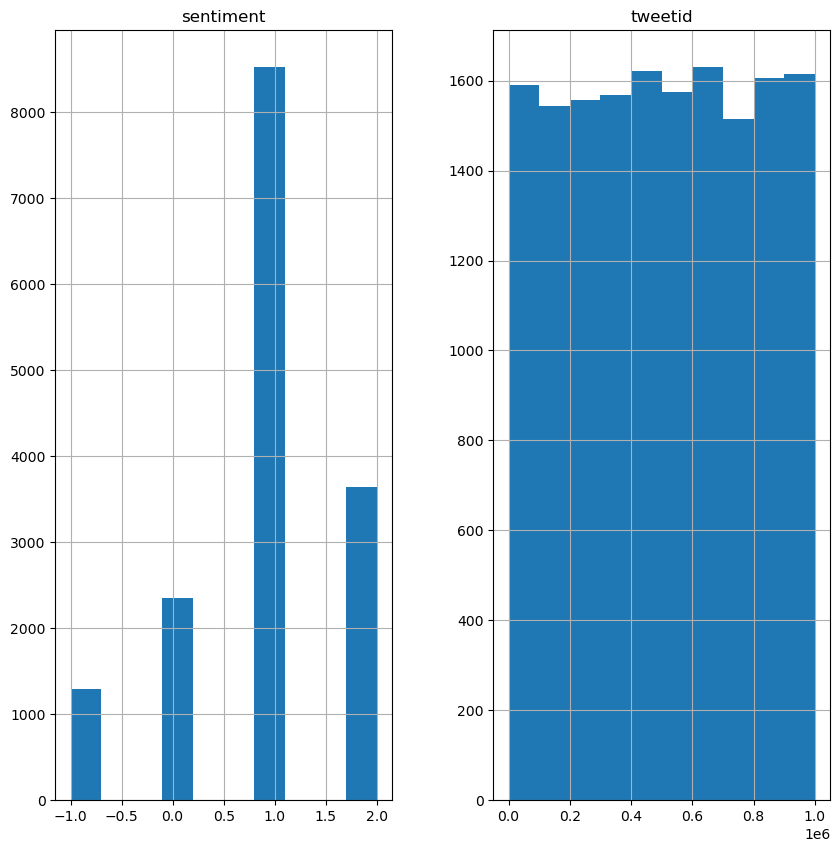

In [56]:
features = ['sentiment', 'tweetid'] # create a list of all numerical features
df_train[features].hist(figsize=(10,10));


Both the histogram and density plot convey identical information.

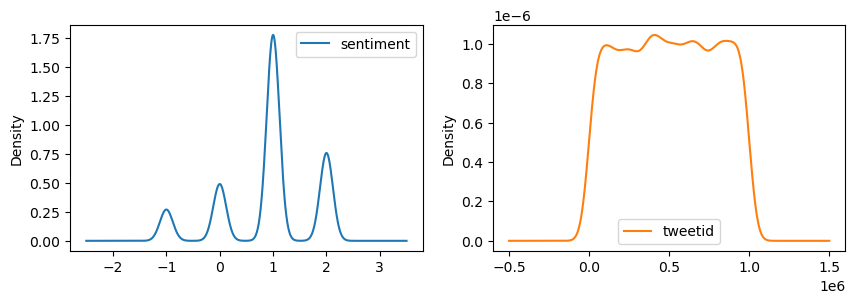

In [57]:
df_train[features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

The boxplot reveals the presence of outliers(dots) in the 'sentiment' feature.

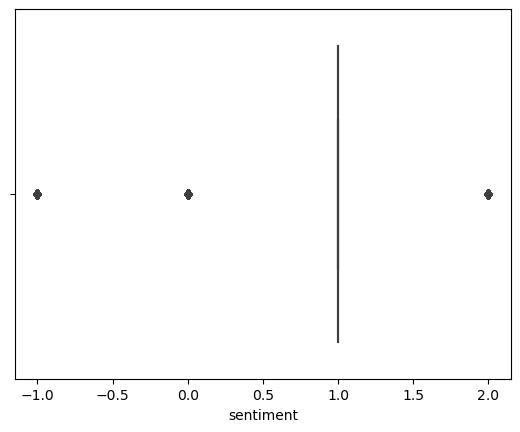

In [58]:
sns.boxplot(x='sentiment', data=df_train);

The box plot provides detailed information about the distribution of the data, indicating that there are no outliers present based on the five-number summary.

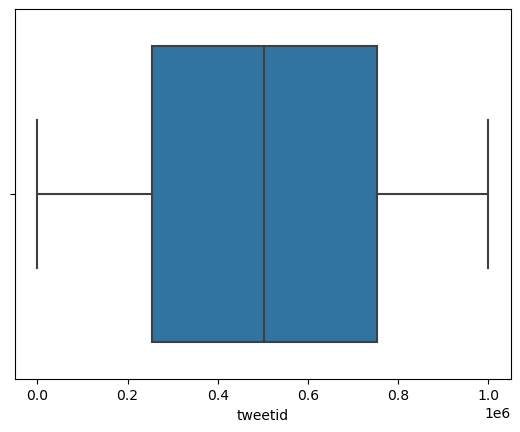

In [59]:
sns.boxplot(x='tweetid', data=df_train);

Label Encoding converts categorical labels into numerical labels. It assigns a unique integer to each category in the 'message' column. This is accomplished using the LabelEncoder class from the sklearn.preprocessing module.

In [60]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train['message'] = label_encoder.fit_transform(df_train['message'])

# One-Hot Encoding (for nominal categorical variables)
df_train_encoded = pd.get_dummies(df_train, columns=['message'])

In [61]:
# Check data types of all columns
print(df_train_encoded.dtypes)

sentiment           int64
tweetid             int64
length              int64
tokenized          object
parts-of-speech    object
                    ...  
message_13649        bool
message_13650        bool
message_13651        bool
message_13652        bool
message_13653        bool
Length: 13660, dtype: object


In [62]:
# Convert all columns to numeric type, coercing non-numeric values to NaN
df_train_encoded = df_train_encoded.apply(pd.to_numeric, errors='coerce')

# Check for any remaining non-numeric values
non_numeric_values = df_train_encoded.select_dtypes(exclude=['number'])
print(non_numeric_values)

       message_0  message_1  message_2  message_3  message_4  message_5  \
0          False      False      False      False      False      False   
1          False      False      False      False      False      False   
2          False      False      False      False      False      False   
3          False      False      False      False      False      False   
4          False      False      False      False      False      False   
...          ...        ...        ...        ...        ...        ...   
15814      False      False      False      False      False      False   
15815      False      False      False      False      False      False   
15816      False      False      False      False      False      False   
15817      False      False      False      False      False      False   
15818      False      False      False      False      False      False   

       message_6  message_7  message_8  message_9  ...  message_13644  \
0          False      Fals

In [63]:
# Check for missing values
print(df_train_encoded.isnull().sum())

sentiment              0
tweetid                0
length                 0
tokenized          15819
parts-of-speech    15819
                   ...  
message_13649          0
message_13650          0
message_13651          0
message_13652          0
message_13653          0
Length: 13660, dtype: int64


The scatter plot above illustrates the relationship between sentiment and tweet ID, with the message hue encoded for additional information.

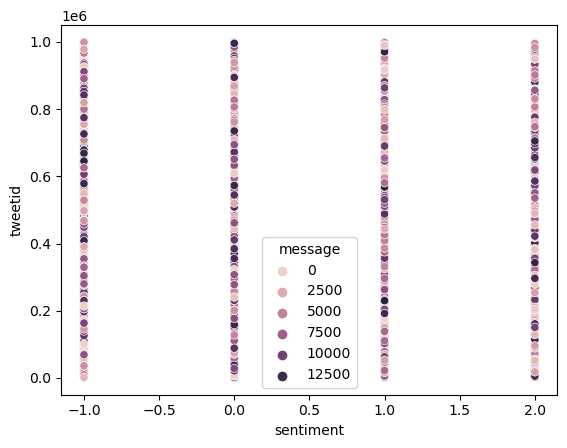

In [64]:
sns.scatterplot(x='sentiment',y='tweetid',hue='message', data=df_train);

The pairplot above displays pairwise relationships between different attributes in the dataset, with message content serving as the hue for additional differentiation.

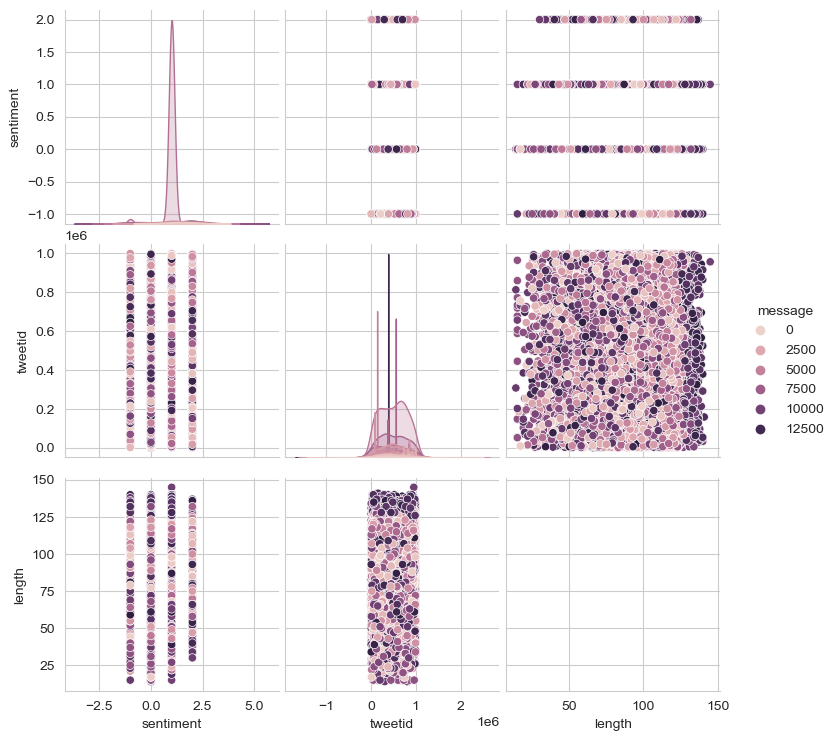

In [65]:
sns.set_style("whitegrid");
sns.pairplot(df_train, hue="message");
plt.show();

The jointplot displays the relationship between the sentiment and tweet ID attributes in the dataset.

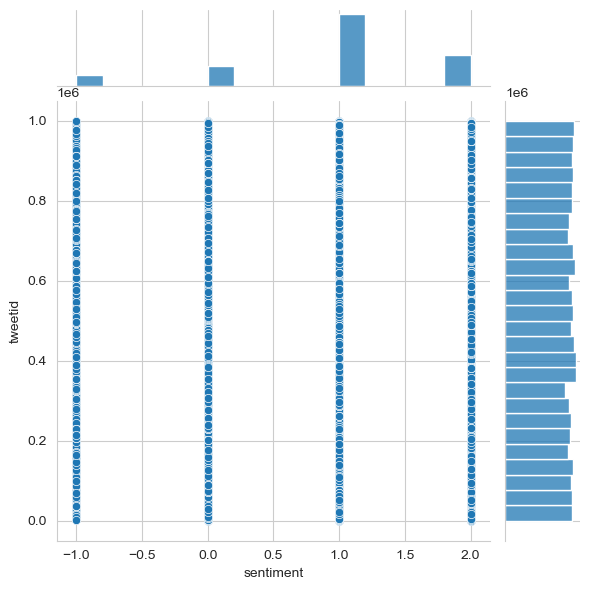

In [66]:
sns.jointplot(x = 'sentiment', y = 'tweetid', data = df_train);

We can enhance the visualization by reintroducing the message variable as a hue parameter, which will add another dimension to the plot. This means that in addition to the relationship between sentiment and tweet ID, we'll also consider the impact of the message content on this relationship.

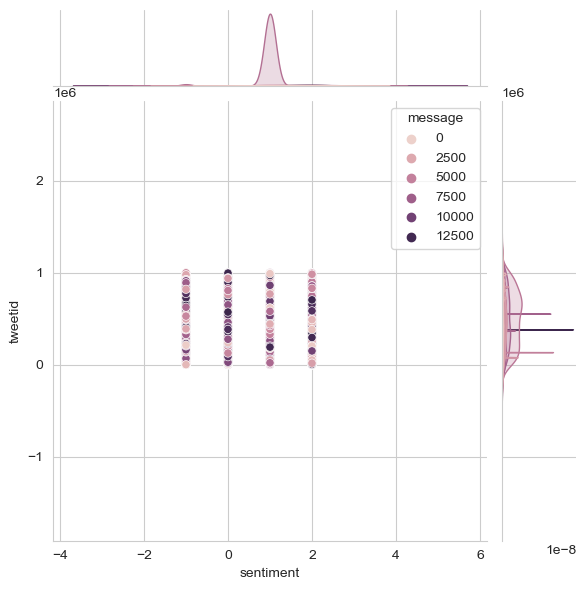

In [67]:
sns.jointplot(x = 'sentiment', y = 'tweetid', data = df_train, hue='message');

# 4. Data Engineering
[Back to Table of Contents](#Table-of-Contents)

⚡ Description: Data engineering ⚡
In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase.


# | In this section, we extract features from the text data and tranform them into the appropriate format for training our model. |

In [68]:
#df_new = df.copy()

In [69]:
df_new = df

In [70]:
df_new.head()

,sentiment,message,tweetid,length,tokenized,parts-of-speech,clean_tweet
0,1,12080,625221,102,"[polyscimajor, epa, chief, doesnt, think, carb...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief doesnt think carbon dio...
1,1,11379,126103,61,"[its, not, like, we, lack, evidence, of, anthr...","[(its, n), (not, r), (like, n), (we, n), (lack...",like lack evidence anthropogenic global warming
2,2,5466,698562,84,"[researchers, say, we, have, three, years, to,...","[(researchers, n), (say, v), (we, n), (have, v...",researcher say three year act climate change late
3,1,12950,573736,73,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[(todayinmaker, n), (wired, v), (2016, n), (wa...",todayinmaker wire 2016 pivotal year war climat...
4,1,3870,466954,97,"[its, 2016, and, a, racist, sexist, climate, c...","[(its, n), (2016, n), (and, n), (a, n), (racis...",2016 racist sexist climate change deny bigot l...


In [71]:
# Load the dataset into a DataFrame

# Create a new column 'sentiment' based on the mapping
#df_new['sentiment'] = df_new['sentiment'].map({2: 1, 1: 1, 0: 0, -1: 0})

#df_new.head()

In [72]:
pie_x_new = df_new.sentiment.value_counts() # to check if the data balances between the pro and the anti
pie_x_new

sentiment
 1    8530
 2    3640
 0    2353
-1    1296
Name: count, dtype: int64

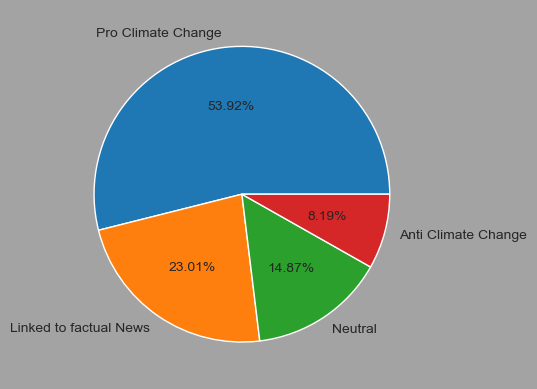

In [73]:
pie_x_new = df_new.sentiment.value_counts()
labels_new = df_new.sentiment.unique()


# Define the label mapping dictionary
label_mapping_new = {1 : 'Pro Climate Change', -1 : 'Anti Climate Change', 0 : 'Neutral', 2 : 'Linked to factual News'}

# Create a vectorized function to apply the mapping
vfunc_new = np.vectorize(lambda x: label_mapping_new[x])

# Apply the mapping to the labels
mapped_labels_new = vfunc_new(labels_new)

# Remove the white background
plt.figure().set_facecolor('#A3A3A3')
plt.pie(pie_x_new ,autopct='%0.2f%%', labels = mapped_labels_new)
plt.show()

The pro greatly superceeds the the anti climate tweet which signifies data inbalance

In [74]:
df_new.head()

,sentiment,message,tweetid,length,tokenized,parts-of-speech,clean_tweet
0,1,12080,625221,102,"[polyscimajor, epa, chief, doesnt, think, carb...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief doesnt think carbon dio...
1,1,11379,126103,61,"[its, not, like, we, lack, evidence, of, anthr...","[(its, n), (not, r), (like, n), (we, n), (lack...",like lack evidence anthropogenic global warming
2,2,5466,698562,84,"[researchers, say, we, have, three, years, to,...","[(researchers, n), (say, v), (we, n), (have, v...",researcher say three year act climate change late
3,1,12950,573736,73,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[(todayinmaker, n), (wired, v), (2016, n), (wa...",todayinmaker wire 2016 pivotal year war climat...
4,1,3870,466954,97,"[its, 2016, and, a, racist, sexist, climate, c...","[(its, n), (2016, n), (and, n), (a, n), (racis...",2016 racist sexist climate change deny bigot l...


In [75]:
# Assigning the features and the labels

X = df_new.clean_tweet
#X = X.reshape(-1, 1) # reshape X to have 2 dimensions

y = df_new.sentiment

In [76]:
X

0        polyscimajor epa chief doesnt think carbon dio...
1          like lack evidence anthropogenic global warming
2        researcher say three year act climate change late
3        todayinmaker wire 2016 pivotal year war climat...
4        2016 racist sexist climate change deny bigot l...
                               ...                        
15814    take material global warm lgbt right health ca...
15815    climate change could break 200millionyearold r...
15816    notiven nytimesworld trump actually believe cl...
15817    hey liberals climate change crap hoax tie agen...
15818                climate change equation 4 screenshots
Name: clean_tweet, Length: 15819, dtype: object

In [77]:
y.isnull().sum()

0

In [78]:
c = Counter(y) # count the values in the labels
c

Counter({1: 8530, 2: 3640, 0: 2353, -1: 1296})

In [79]:
# # Define the pipeline
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# # Define the vectorizers
# tfidf_vectorizer = TfidfVectorizer(max_features=4000)
# count_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=4000, stop_words='english')

# # Define the pipeline
# pipeline = Pipeline([
#     ('vectorizer', FeatureUnion([
#         ('tfidf', tfidf_vectorizer),
#         ('count', count_vectorizer)
#     ]))])

# # Fit and transform the data using the pipeline
# X_vectorized = pipeline.fit_transform(X_list)

In [80]:
# Convert the input data to a list of strings

#X_ROS_list = [str(x) for x in X_ROS]

In [81]:
# Split the data set to training and validation data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model Building and Evaluation
[Back to Table of Contents](#Table-of-Contents)

⚡ Description: Modelling ⚡
In this section, you are required to create one or more regression models that are able to accurately predict the climate change


**we'll make use of the countvectorizer and TfidfTransformer for feature transformation on our tweets and converting it to binary array for our classifier**

In [82]:
# we'll use the pipeline module to combine both transformation and classifiers at a go?

from sklearn.pipeline import Pipeline, FeatureUnion # pipeline and FeatureUnion for concatenating both type of transformers features to read information captured by both transformers
from sklearn.feature_extraction.text import TfidfVectorizer # Tfidf vectorizer
from sklearn.feature_extraction.text import CountVectorizer # countvectorizer
from sklearn.svm import SVC  # SVM classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN classifier
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier
from lightgbm import LGBMClassifier  # LightGBM classifier

from sklearn.metrics import accuracy_score, f1_score, classification_report # evaluation metric

# First Model - SVC

**Use the sklearn pipeline module to link the transformation and feature extraction together**

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [84]:
# Define the pipeline steps

count_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=4000, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_features=4000)
svm_classifier = SVC(kernel='rbf')

svc_steps = [
    ('feature_union', FeatureUnion([
        ('count_vectorizer', count_vectorizer),
        ('tfidf_vectorizer', tfidf_vectorizer)
    ])),
    ('classifier', svm_classifier)
]

# Create the pipeline
svc_pipe = Pipeline(svc_steps)

# Fit the pipeline to the training data
svc_pipe.fit(X_train, y_train)

# Evaluate on the test data
accuracy = svc_pipe.score(X_test, y_test)

# Make predictions on the testing data
y_pred_svc = svc_pipe.predict(X_test)


# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_svc)
print(accuracy)

0.7281921618204804


In [85]:
svc_pipe_report = classification_report(y_test, y_pred_svc)
print("\n\nClassification Report:\n\n", svc_pipe_report)



Classification Report:

               precision    recall  f1-score   support

          -1       0.83      0.26      0.39       278
           0       0.64      0.34      0.45       425
           1       0.72      0.91      0.81      1755
           2       0.76      0.69      0.73       706

    accuracy                           0.73      3164
   macro avg       0.74      0.55      0.59      3164
weighted avg       0.73      0.73      0.70      3164



**Built another model using the tfidfvectorizer()**

In [86]:
tfidf_vectorizer = TfidfVectorizer(max_features=4000)
svm_classifier = SVC(kernel='rbf')

svc_steps_tfidf = [
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('classifier', svm_classifier)
]

# Create the pipeline
svc_pipe_ = Pipeline(svc_steps_tfidf)
svc_pipe_tfidf =  Pipeline(svc_steps_tfidf)

In [87]:
svc_pipe_.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=4000)),
                ('classifier', SVC())])

In [88]:
svc_pipe_pred = svc_pipe_.predict(X_test)

In [89]:
svc_pipe_pred

array([1, 2, 1, ..., 1, 1, 2], dtype=int64)

In [90]:
# created a function to calculate the accuracy score

def calculate_accuracy(clf, X_test, y_test):
    #your code here
    
    # use the trained model to carry out prediction
    y_pred = clf.predict(X_test)
    
    # check for accuracy
    acc = accuracy_score(y_test, y_pred)
    print(acc)

In [91]:
accuracy = calculate_accuracy(svc_pipe_, X_test, y_test)
accuracy

0.7348293299620733


In [92]:
rep = classification_report(y_test, svc_pipe_pred)
print("\n\nClassification Report:\n\n", rep)



Classification Report:

               precision    recall  f1-score   support

          -1       0.87      0.29      0.44       278
           0       0.70      0.32      0.44       425
           1       0.72      0.92      0.81      1755
           2       0.79      0.69      0.74       706

    accuracy                           0.73      3164
   macro avg       0.77      0.56      0.61      3164
weighted avg       0.74      0.73      0.71      3164



In [93]:
# created a function to get the class report for each model created

def get_class_report(clf, X_test, y_test):
    #your code here
    
    # create the predictions
    y_pred = clf.predict(X_test)
    
    # create the report
    report = classification_report(y_test, y_pred)
    
    return report

In [94]:
print("\n\nClassification Report:\n\n", get_class_report(svc_pipe_tfidf, X_test, y_test))



Classification Report:

               precision    recall  f1-score   support

          -1       0.87      0.29      0.44       278
           0       0.70      0.32      0.44       425
           1       0.72      0.92      0.81      1755
           2       0.79      0.69      0.74       706

    accuracy                           0.73      3164
   macro avg       0.77      0.56      0.61      3164
weighted avg       0.74      0.73      0.71      3164



**RandomforestClassifier**

In [95]:
# Building the random forest classifier

forest = RandomForestClassifier()   # initialiize the forest classifier


forest_steps = [
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('classifier', forest)
]

# Create the pipeline
forest_pipe = Pipeline(forest_steps)

In [96]:
# train the model
forest_pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=4000)),
                ('classifier', RandomForestClassifier())])

In [97]:
pred_forest = forest_pipe.predict(X_test) # make prediction on the test data for validation

In [98]:
pred_forest

array([1, 2, 1, ..., 1, 1, 0], dtype=int64)

In [99]:
print("\n\nClassification Report:\n\n", get_class_report(forest_pipe, X_test, y_test))



Classification Report:

               precision    recall  f1-score   support

          -1       0.85      0.21      0.34       278
           0       0.59      0.33      0.42       425
           1       0.70      0.89      0.78      1755
           2       0.73      0.64      0.68       706

    accuracy                           0.70      3164
   macro avg       0.72      0.52      0.56      3164
weighted avg       0.71      0.70      0.67      3164



**Parameter Grid Search for RandomForestClassifier()**

In [100]:
# import the model selection gridsearchcv modeule from the sklearn package
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'vectorizer__max_features': [2000, 4000, 6000],  # Vary the max_features parameter of TfidfVectorizer
    'classifier__n_estimators': [100, 200, 300],  # Vary the number of estimators in RandomForestClassifier
    'classifier__max_depth': [None, 5, 10]  # Vary the maximum depth of the trees in RandomForestClassifier
}

# create the pipe
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
acc_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\n\nClassification Report:\n\n", acc_report)

# 6. Model Performance
[Back to Table of Contents](#Table-of-Contents)

⚡ Description: Model performance ⚡
In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why.

# 7. Model Explanations
[Back to Table of Contents](#Table-of-Contents)

⚡ Description: Model explanation ⚡
In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings.